# PoleFigurePhaseFractions.ipynb
Written by Adam Creuziger (adam.creuziger@nist.gov)

Oct 2017

    This data was developed by employees of the National Institute of Standards and Technology (NIST), an agency of the Federal Government. Pursuant to title 17 United States Code Section 105, works of NIST employees are not subject to copyright protection in the United States and are considered to be in the public domain.

    The data is provided by NIST as a public service and is expressly provided "AS IS." NIST MAKES NO WARRANTY OF ANY KIND, EXPRESS, IMPLIED OR STATUTORY, INCLUDING, WITHOUT LIMITATION, THE IMPLIED WARRANTY OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, NON-INFRINGEMENT AND DATA ACCURACY. NIST does not warrant or make any representations regarding the use of the data or the results thereof, including but not limited to the correctness, accuracy, reliability or usefulness of the data. NIST SHALL NOT BE LIABLE AND YOU HEREBY RELEASE NIST FROM LIABILITY FOR ANY INDIRECT, CONSEQUENTIAL, SPECIAL, OR INCIDENTAL DAMAGES (INCLUDING DAMAGES FOR LOSS OF BUSINESS PROFITS, BUSINESS INTERRUPTION, LOSS OF BUSINESS INFORMATION, AND THE LIKE), WHETHER ARISING IN TORT, CONTRACT, OR OTHERWISE, ARISING FROM OR RELATING TO THE DATA (OR THE USE OF OR INABILITY TO USE THIS DATA), EVEN IF NIST HAS BEEN ADVISED OF THE POSSIBILITY OF SUCH DAMAGES.

    To the extent that NIST may hold copyright in countries other than the United States, you are hereby granted the non-exclusive irrevocable and unconditional right to print, publish, prepare derivative works and distribute the NIST data, in any medium, or authorize others to do so on your behalf, on a royalty-free basis throughout the world.

    You may improve, modify, and create derivative works of the data or any portion of the data, and you may copy and distribute such modifications or works. Modified works should carry a notice stating that you changed the data and should note the date and nature of any such change. Please explicitly acknowledge the National Institute of Standards and Technology as the source of the data: Data citation recommendations are provided below.

    Permission to use this data is contingent upon your acceptance of the terms of this agreement and upon your providing appropriate acknowledgments of NIST's creation of the data.


See: https://www.nist.gov/director/licensing

## Packages used in this Jupyter Notebook

In [ ]:
# Install packages not found in conda
# Only needs to be installed during first run
#pip install fortranformat
#pip install mplstereonet

## Need the development release of mplstereonet to work with matplotlib 3.2.2
## https://github.com/joferkington/mplstereonet/issues/34 
#pip install https://github.com/joferkington/mplstereonet/zipball/master

In [1]:
#import fortranformat as ff
import numpy as np 
import pandas as pd
import scipy as scipy
from scipy import interpolate 
from scipy import signal
import matplotlib.pyplot as plt
import mplstereonet
import math
import os
from importlib import reload
import seaborn as sns
print ('Finished')

Finished


In [2]:
# Custom modules
import TextureSampling
import PlotTexture

In [8]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

<module 'PlotTexture' from '/Users/creuzige/Documents/NIST_Research/GitHub/Texture-Sampling-PhaseMeasurement-BiasErrors/JupyterNotebooks/PlotTexture.py'>

In [4]:
cwd=os.getcwd()
SaveFolder="SavedFiles_2021Oct07"

if not os.path.exists(SaveFolder):
    os.makedirs(SaveFolder)

SaveFolderPath=os.path.abspath(os.path.join(cwd, SaveFolder))

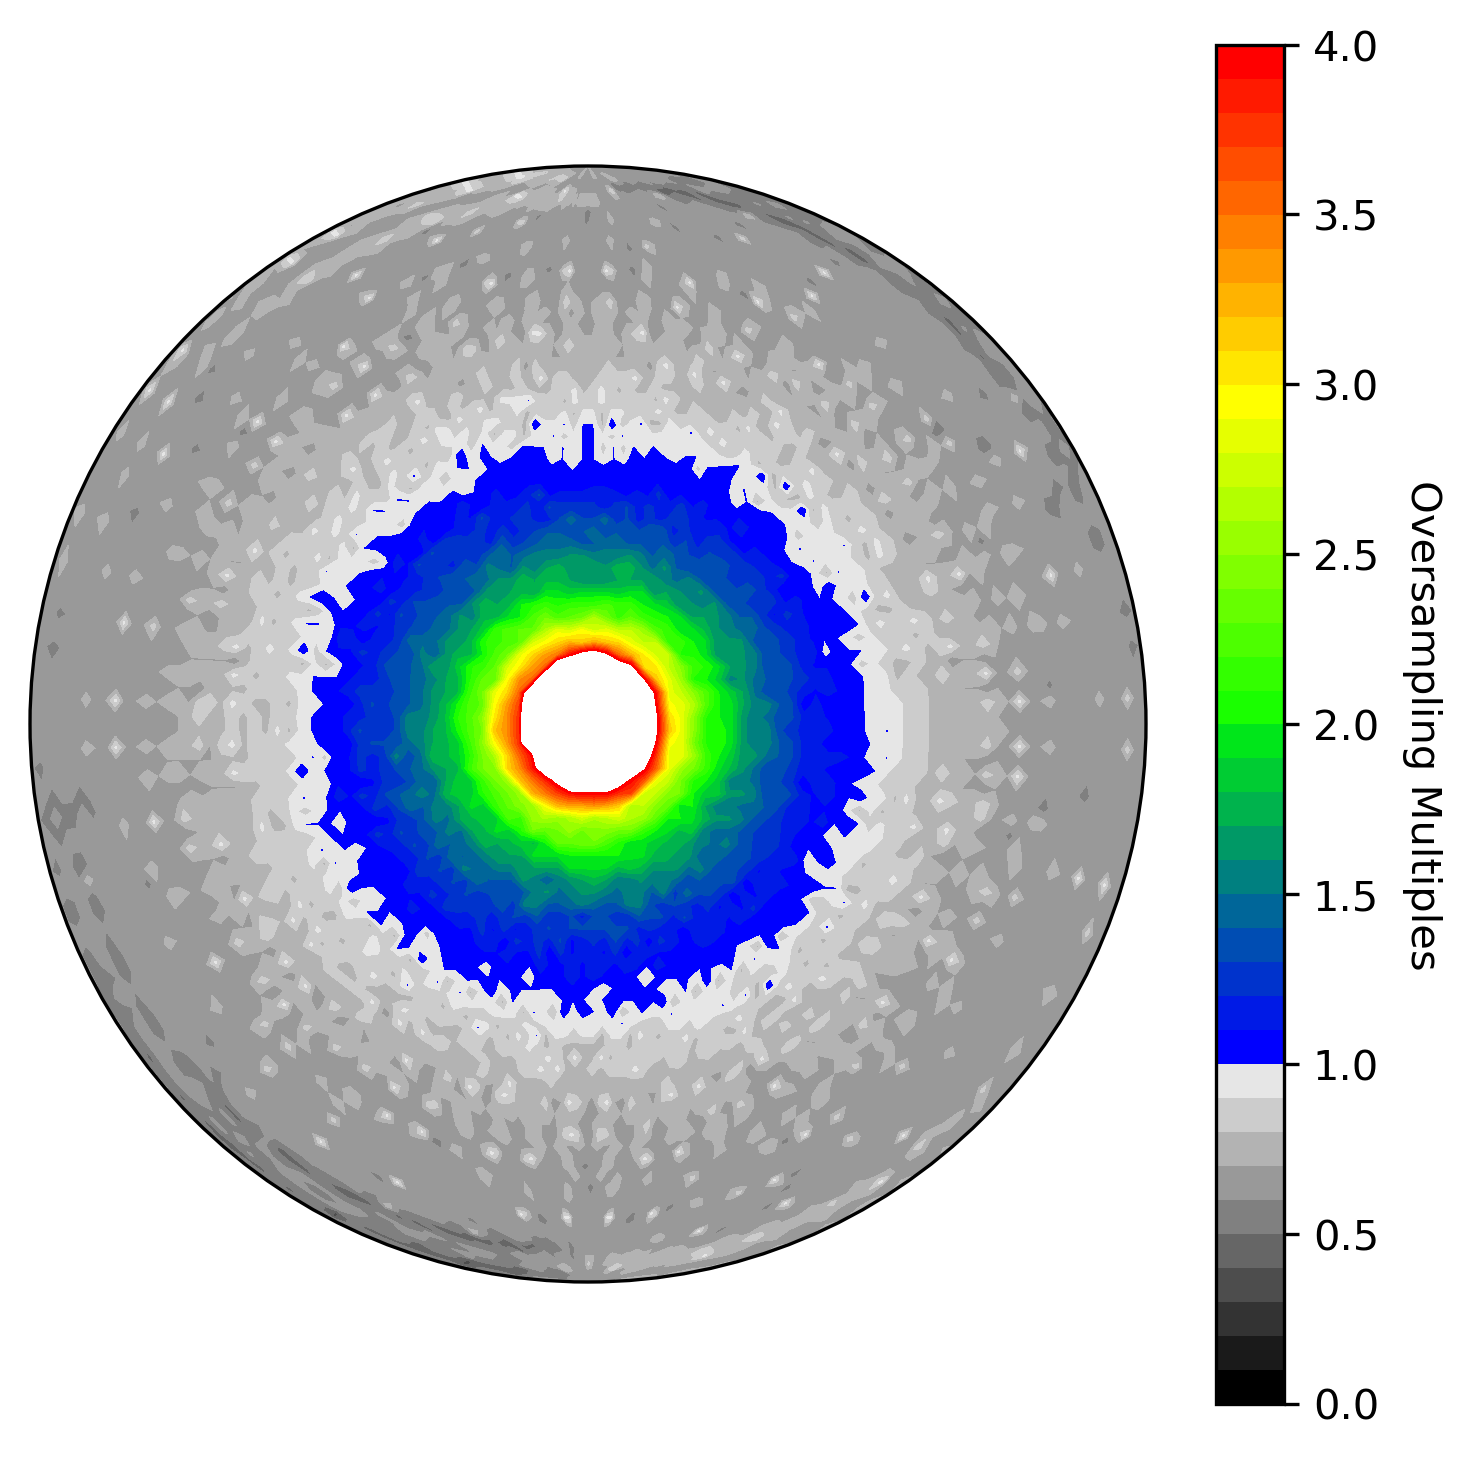

In [9]:
## Check max value in Holden

SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden', resolution=5)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,maxValue=20)

## Scatter & Contour Plots (Figs 1 & 2)

In [ ]:
# Cr radiation: (211) Ferrite 2-theta=155.6, theta=77.8;  (220) Austenite 2-theta=128.4, theta=64.2
# SchemeName, Coordinates=TextureSampling.SpiralScheme('Rizzie Spiral', 90.0, 6480)
# PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
# PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')

SchemeName, Coordinates= TextureSampling.SpiralGrid('Spiral', 5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True,
                               savename=os.path.join(SaveFolderPath,(str(SchemeName)+'_contour.png')))
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',4.0, save=True, cmd=True, 
                             savename=os.path.join(SaveFolderPath,(str(SchemeName)+'_scatter.png')))
#print(len(Coordinates))

SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden', resolution=5)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, 
                               savename=os.path.join(SaveFolderPath,(str(SchemeName)+'_contour.png')))
PlotTexture.SingleSchemePlot(SchemeName, Coordinates, 'ko', 4.0, save=True, 
                             savename=os.path.join(SaveFolderPath,(str(SchemeName)+'_scatter.png')))
#print(len(Coordinates))

SchemeName, Coordinates=TextureSampling.HexGrid('Rizzie Hex',90.0, 5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, 
                               savename=os.path.join(SaveFolderPath,(str(SchemeName)+'_contour.png')))
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',4.0, save=True, cmd=True, 
                             savename=os.path.join(SaveFolderPath,(str(SchemeName)+'_scatter.png')))
#print(len(Coordinates))

# SchemeName, Coordinates=TextureSampling.HexGrid('Partial hex',60.0, 5.0)
# PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
# PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')

SchemeName, Coordinates= TextureSampling.BT8_HexGrid('Matthies', 90.0, 5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, 
                               savename=os.path.join(SaveFolderPath,(str(SchemeName)+'_contour.png')))
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',4.0, save=True, cmd=True, 
                             savename=os.path.join(SaveFolderPath,(str(SchemeName)+'_scatter.png')))
#print(len(Coordinates))





## Number of points (Table 1)

In [ ]:
# 2.5 deg resolution
SchemeName, Coordinates= TextureSampling.SpiralGrid('Spiral', 2.5)
print(len(Coordinates))

SchemeName, Coordinates=TextureSampling.HexGrid('Rizzie Hex',90.0, 2.5)
print(len(Coordinates))

SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden', resolution=2.5)
print(len(Coordinates))

SchemeName, Coordinates= TextureSampling.BT8_HexGrid('Matthies', 90.0, 2.5)
print(len(Coordinates))

print()

# 5 deg resolution
SchemeName, Coordinates= TextureSampling.SpiralGrid('Spiral', 5.0)
print(len(Coordinates))

SchemeName, Coordinates=TextureSampling.HexGrid('Rizzie Hex',90.0, 5.0)
print(len(Coordinates))

SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden', resolution=5)
print(len(Coordinates))

SchemeName, Coordinates= TextureSampling.BT8_HexGrid('Matthies', 90.0, 5.0)
print(len(Coordinates))

print()

#10 deg resolution
SchemeName, Coordinates= TextureSampling.SpiralGrid('Spiral', 10.0)
print(len(Coordinates))

SchemeName, Coordinates=TextureSampling.HexGrid('Rizzie Hex',90.0, 10.0)
print(len(Coordinates))

SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden', resolution=10)
print(len(Coordinates))

SchemeName, Coordinates= TextureSampling.BT8_HexGrid('Matthies', 90.0, 10.0)
print(len(Coordinates))


## Create a dataframe of all Scheme resolutions tested

In [ ]:
column_names = ["SchemeName", "Coordinates", "MarkerType", "MarkerSize"]
SchemeDF = pd.DataFrame(columns = column_names)

SchemeName, Coordinates= TextureSampling.SpiralGrid("Spiral2.5", 2.5)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)

SchemeName, Coordinates= TextureSampling.SpiralGrid("Spiral5", 5.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)

SchemeName, Coordinates= TextureSampling.SpiralGrid("Spiral7.5", 7.5)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)

SchemeName, Coordinates= TextureSampling.SpiralGrid("Spiral10", 10.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)

SchemeName, Coordinates= TextureSampling.SpiralGrid("Spiral15", 15.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)

SchemeName, Coordinates= TextureSampling.SpiralGrid("Spiral20", 20.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)

# Holden sprial

#SchemeName, Coordinates = TextureSampling.KlugAlexanderSpiral("Holden Spiral", mirror=False, quadlock=False)
SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden2.5', resolution=2.5)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden5', resolution=5.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden7.5', resolution=7.5)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden10', resolution=10.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden15', resolution=15.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden20', resolution=20.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)


# Rizzie Hex Grid Schemes      
SchemeName,Coordinates=TextureSampling.HexGrid("RizzieHex2.5",90.0,2.5)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
                                      columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.HexGrid("RizzieHex5",90.0,5.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
                                      columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.HexGrid("RizzieHex7.5",90.0,7.5)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
                                      columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.HexGrid("RizzieHex10",90.0,10.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
                                      columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.HexGrid("RizzieHex15",90.0,15.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.HexGrid("RizzieHex20",90.0,20.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

#Matthies Hex Grid

SchemeName,Coordinates=TextureSampling.BT8_HexGrid("Mathhies_2.5", 90.0, 2.5)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.BT8_HexGrid("Mathhies_5", 90.0, 5.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.BT8_HexGrid("Mathhies_10", 90.0, 10.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.BT8_HexGrid("Mathhies_15", 90.0, 15.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.BT8_HexGrid("Mathhies_15", 90.0, 15.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.BT8_HexGrid("Mathhies_20", 90.0, 20.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)


# SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex-60", 60.0, 5.0)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex-Quad", 90.0, 5.0, CoverageType='quad')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex-Quad60", 60.0, 5.0, CoverageType='quad')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)




        

#SchemeName, Coordinates = TextureSampling.SpiralScheme("Rizzie Spiral", 90.0, 6480)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)


In [ ]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

In [ ]:
#Fix directory if lost
os.chdir(os.path.join("/Users", 'creuzige', 'Documents', 'NIST_Research','GitHub',
                 'Texture-Sampling-PhaseMeasurement-BiasErrors','JupyterNotebooks'))

# Generate Arrays of Halfwidths (takes a long time)
#### Can skip and just assign IntensitiesPath if this step was completed prior

In [ ]:
## Test Generation of Average Intensities from dataframe
# Experimental data only
# Mtex data

# Get the current working directory path
cwd=os.getcwd()
Mtexdatapath=os.path.abspath(os.path.join(cwd, '..', 'Matlab', 'MtexDataHWnoMaa'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AvgHW_2021Aug17'))
TextureSampling.GenerateAveIntesity(SchemeDF,"mtex", Mtexdatapath, IntensitesPath)

In [ ]:
# If skipping HW generation, assign path to folder

IntensitesPath=os.path.abspath(os.path.join(cwd, 'AvgHW_2021Aug17'))

In [ ]:
#Use if from MAUD

# cwd=os.getcwd()
# xpcdatapath=os.path.abspath(os.path.join(cwd, '..', 'MAUD', 'XPCFiles'))
# IntensitesPath=os.path.abspath(os.path.join(cwd, 'AllAveragedIntensities'))
# TextureSampling.GenerateAveIntesity(SchemeDF, "xpc",xpcdatapath, IntensitesPath)

In [ ]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

In [ ]:
#DFF["1Pair-A"]
# cwd=os.getcwd()
# Mtexdatapath=os.path.abspath(os.path.join(cwd, '..', 'Matlab', 'MtexDataHW'))
# IntensitesPath=os.path.abspath(os.path.join(cwd, 'AvgHW'))

# Representation of Simulation Results
## Feel free to delete any of the following if you would like, but I will leave all the plotting functions we have here for now...

### Heatmaps (Fig 4 to 7)

In [ ]:
# Test Heatmap
PlotTexture.PlotHeatmap(10, "3Pairs-C", "Spiral5", IntensitesPath, VF=.25,
                        cbarRange=[0.2,0.3], keepTitle=False,save=True, 
                        savename=os.path.join(SaveFolderPath,"Spiral5_HW10.png"))

PlotTexture.PlotHeatmap(10, "3Pairs-C", "Holden5", IntensitesPath, VF=.25,
                        cbarRange=[0.2,0.3], keepTitle=False,save=True, 
                        savename=os.path.join(SaveFolderPath,"Holden5_HW10.png"))

PlotTexture.PlotHeatmap(10, "3Pairs-C", "RizzieHex5", IntensitesPath, VF=.25,
                        cbarRange=[0.2,0.3], keepTitle=False,save=True, 
                        savename=os.path.join(SaveFolderPath,"Rizzie5_HW10.png"))

# Note misspelled name
PlotTexture.PlotHeatmap(10, "3Pairs-C", "Mathhies_5", IntensitesPath, VF=.25,
                        cbarRange=[0.2,0.3], keepTitle=False,save=True, 
                        savename=os.path.join(SaveFolderPath,"Matthies5_HW10.png"))

#PlotTexture.PlotHeatmap(10, "3Pairs-C", "BT8Hex_5", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
#PlotTexture.PlotHeatmap(20, "3Pairs-C", "Holden", IntensitesPath)
#PlotTexture.PlotHeatmap(20, "3Pairs-C", "Rizzie Sprial", IntensitiesPath)

In [ ]:
#IntensitiesPath
IntensitesPath

## Figure 3

In [ ]:
#Note misspelled Mathhies...
def AnalyzeHalfwidths2(SchemeList=["Spiral5", "Holden5", "RizzieHex5", "Mathhies_5"],
                       HWList=[3,5,10,15,20, 25,30], Folder=IntensitesPath, PeakCombo='3Pairs-C', VF=0.25):

    for Scheme in SchemeList:
        print(Scheme)
        mini=[]
        maxi=[]

        for hw in HWList:
            #print(hw)
            #if (hw==3):
            #    HW='03'
            #elif (hw==5):
            #    HW='05'
            #else:
            #    HW=str(hw)
            HW=str(hw)
            
            AusteniteTextures=[]
            FerriteTextures=[] 
            VFList=[]

            for file in os.listdir(Folder):
                #print(file)
                if (file.find("A-HW"+HW)>0):
                    #print(file)
                    AusteniteTextures.append(file)

                elif (file.find("F-HW"+HW)>0):
                    #print(file)
                    FerriteTextures.append(file)
                else: ()
    

            for AustOrient in AusteniteTextures:
                for FerrOrient in FerriteTextures:
        
            
                    DFF=pd.read_excel(os.path.join(Folder,FerrOrient),header=1,skipfooter=0)
                    DFA=pd.read_excel(os.path.join(Folder,AustOrient),header=1,skipfooter=0)

                    # Revised, some issues with what's returned
                    # Pandas returns a larger array instead of just one value - AC 2021 Mar 29
                    F_val=float(DFF.loc[DFF['HKL'] == Scheme][PeakCombo])
                    A_val=float(DFA.loc[DFA['HKL'] == Scheme][PeakCombo])
                    #print (DFF)
                    #print (DFA)
                
            
                    # Append to lists
                    VFList.append(VF*A_val/(VF*A_val+((1.0-VF)*F_val)))
        
            mini.append(min(VFList))
            maxi.append(max(VFList))
            VFList=[]
            
        if (Scheme==SchemeList[0]):
            plt.fill_between(HWList,mini, y2=maxi, alpha=1.0, color="0.5", label='Spiral Scheme', zorder=10)
            plt.plot(HWList,mini,',-k',label="", zorder=10)
            plt.plot(HWList,maxi,',-k',label="", zorder=10)
            
            
        elif (Scheme==SchemeList[1]):
            plt.fill_between(HWList,mini, y2=maxi, alpha=1.0, color="0.9", label='Holden Scheme', zorder=0)
            plt.plot(HWList,mini,',-k',label="", zorder=0)
            plt.plot(HWList,maxi,',-k',label="", zorder=0)
            
        elif (Scheme==SchemeList[2]):
            plt.fill_between(HWList,mini, y2=maxi, alpha=1.0, color="0.2", label='Rizzie Hex Scheme', zorder=15)
            plt.plot(HWList,mini,',-w',label="", zorder=15)
            plt.plot(HWList,maxi,',-w',label="", zorder=15)
            
        elif (Scheme==SchemeList[3]):
            plt.fill_between(HWList,mini, y2=maxi, alpha=1.0, color="0.75", label='Matthies Hex Scheme', zorder=5)
            plt.plot(HWList,mini,',-k',label="", zorder=5)
            plt.plot(HWList,maxi,',-k',label="", zorder=5)    
            


            

        

        mini=[]
        maxi=[]
    

    # maybe make 2 plots, one overall and one focused near center

    plt.xlabel('ODF Halfwidth '+r'($^\circ$)')
    plt.ylabel('Phase Fraction')
    #plt.title('Measurement Accuracy as a function of Halfwidth at 5 degree resolution')
    #plt.ylim(0.07,0.6)
    plt.ylim(0.15,0.35)
    plt.hlines(0.25,xmin=0,xmax=30, linestyles='solid', label='Nominal Value', zorder=100)
    plt.hlines(0.2375,xmin=0,xmax=30, linestyles='dashed', label='5% Error Bound', zorder=100)
    plt.hlines(0.2625,xmin=0,xmax=30, linestyles='dashed', label='', zorder=100)
    plt.legend(loc='upper center',ncol=2,bbox_to_anchor=(.5, 1.28)) #
    plt.savefig(os.path.join(SaveFolderPath,"HW_Comparison.png"), bbox_inches='tight')
    plt.show()

AnalyzeHalfwidths2()    
    

In [ ]:
plt.fill_between([0,1,2],[3,3,3], y2=[5,5,5], alpha=1.0, color="0.2", label='Matthies Hex Scheme', zorder=5)
plt.show()

## Export 5 deg grids 
#### Export function doesn't currently allow for folder/path to be specified

In [ ]:
# Sampling scheme test functions
TextureSampling.SpiralGrid("Spiral",5.0, export=True)
TextureSampling.BT8_HexGrid("Matthies", 90.0, 5.0, export=True)
TextureSampling.HexGrid("Rizzie Hex", 90.0, 5.0, export=True)
#TextureSampling.SpiralScheme("Rizzie Spiral", 90.0, 21600)
TextureSampling.KlugAlexanderSpiral('Holden', resolution=5, export=True)


### Alternate Heatmap?

In [ ]:
# New Heatmap Function
def Heatmap(hw, Folder, schemelist=['Spiral5', 'CLR_5', 'HexGrid-90degTilt5degRes' , 'BT8Hex_5'], peaklist=['1Pair-A', '1Pair-B', '2Pairs-A','2Pairs-B', '3Pairs-A', '3Pairs-B', '3Pairs-C'],Scheme2=None, VF=0.25, cbarMap=False, cbarRange=[0,0.1], save=False, cmd=False, savename='test.png'):
    
    """
    
    """
    import fnmatch
    import os
    import pandas as pd
    import numpy as np
    import seaborn as sns
    from matplotlib import pyplot as plt
    from statistics import mean 

    datalist=[]
    for s in schemelist:
        for p in peaklist:
            datalist.append((s,p))
    
    if (hw==3):
        HW='03'
    elif (hw==5):
        HW='05'
    else:
        HW=str(hw)
    

    schemes=[]
    peaks=[]
    frac_list=[]
    range_list=[]
    for Scheme,PeakCombo in datalist:
        AusteniteTextures=[]
        FerriteTextures=[]  


        for file in os.listdir(Folder):
        
            if (file.find("A-HW"+HW)>0):
                AusteniteTextures.append(file)
            elif (file.find("F-HW"+HW)>0):
                FerriteTextures.append(file)
            else: ()
            
            #print (FerriteTextures)
            #print AusteniteTextures
        
        # Create as dictionary, easier for seaborn later, and single valued entries
        AustList=[]
        FerrList=[]
        VFList=[]
        AVFList=[] # for mins and maxes
        
        for AustOrient in AusteniteTextures:
            for FerrOrient in FerriteTextures:
            
                
                DFF=pd.read_excel(os.path.join(Folder,FerrOrient),header=1,skipfooter=0)
                DFA=pd.read_excel(os.path.join(Folder,AustOrient),header=1,skipfooter=0)

                if Scheme2 != None:
                
                    F_val=float(DFF.loc[DFF['HKL'] == Scheme][PeakCombo])
                    A_val=float(DFA.loc[DFA['HKL'] == Scheme2][PeakCombo])
                
                else :
                    # Revised, some issues with what's returned
                    # Pandas returns a larger array instead of just one value - AC 2021 Mar 29
                    F_val=float(DFF.loc[DFF['HKL'] == Scheme][PeakCombo])
                    A_val=float(DFA.loc[DFA['HKL'] == Scheme][PeakCombo])
                    #print (DFF)
                    #print (DFA)
                    
                #split at file type and halfwidth for names
                Fname=FerrOrient.split(".")[0].split("-")[0]
                Aname=AustOrient.split(".")[0].split("-")[0]
                
                # Append to lists
                AustList.append(Aname)
                FerrList.append(Fname)
                VFList.append(abs((VF*A_val/(VF*A_val+((1.0-VF)*F_val)))-0.25))
                AVFList.append((VF*A_val/(VF*A_val+((1.0-VF)*F_val)))-0.25)

            
        range_list.append('Min: '+str(round(min(AVFList),3)) + '\n' + 'Max: '+str(round(max(AVFList),3))) 
        frac_list.append(mean(VFList))
        schemes.append(Scheme)
        peaks.append(PeakCombo)

    dataDict={"Schemes":schemes, "Peak Combinations": peaks, "VF":frac_list}
    SaveTable=pd.pivot_table(pd.DataFrame.from_dict(dataDict),index="Schemes", columns="Peak Combinations")


    
    #used for debugging
    #return dataDict
    #return EmptyDF
    
    
    # Need to rename columns since pivot_tables return a multiindex data frame
    FerriteNames=[col[1] for col in SaveTable.columns.values]

 
    # I think this has been depricated- AC 29 Mar 2021
#    values[values == ''] = 0.0
#    Values = values.astype(np.float)
#    labels=[]
#    for val in Values:
#        if(val>=0.255):
#            labels.append("+")
#        elif(val<=0.245):
#            labels.append("-")
#        else:
#            labels.append("O")
#    labels=np.asarray(labels)
    #labels.resize(len(yaxis),len(xaxis)) 
    #labels=pd.DataFrame(labels)

    # plotting

    # aligning labels
    data={"Schemes":schemes, "Peak Combinations": peaks, "VF":range_list}
    Table=pd.pivot(pd.DataFrame.from_dict(data),index="Schemes", columns="Peak Combinations")
    
    
    
    if cbarMap=='grey':
        color= sns.diverging_palette(359, 359, 99, l=0, sep=1, n=50, center='light', as_cmap=True)
    
    else:
        color= sns.color_palette("coolwarm", 25)
    
    plt.figure(figsize = (13,7))
    figure=sns.heatmap(SaveTable, vmin=cbarRange[0], vmax=cbarRange[1], cmap='Blues', annot=Table, fmt= '',linewidths=0.5,square=True,cbar_kws={"shrink": .80}, xticklabels=FerriteNames)
    #figure=sns.heatmap(SaveTable2, vmin=cbarRange[0], vmax=cbarRange[1], cmap='Blues', annot=True, fmt= '', annot_kws={'alpha': 0.1}, linewidths=0.5,square=True,cbar_kws={"shrink": .80})
    figure.set_xlabel('Peak Combinations')
    #figure=sns.heatmap(df_wide,vmin=0.0, vmax=0.50, cmap=color,center=0.25,annot=dw, annot_kws={"size": 18},fmt='',linewidths=0.5,square=True,cbar_kws={"shrink": .80})
    plt.title("Plotting Phase Fraction Measurement Error for a Halfwidth of "+HW, fontsize =18)
    bottom, top = figure.get_ylim()
    figure.set_ylim(bottom + 0.5, top - 0.5)
    
    #return figure
    if save==True:
        plt.savefig(savename, bbox_inches='tight')

    if cmd==False:
        plt.show()


Heatmap(10, IntensitesPath)

In [ ]:
# Get the current working directory path
cwd=os.getcwd()
#print cwd
xpcdatapath=os.path.abspath(os.path.join(os.path.dirname(cwd)))
#print xpcdatapath
# Use join instead, it's better cross platform
Folder=os.path.join(cwd,'AveragedIntensites')
DFA=pd.read_excel(os.path.join(Folder, 'o554F-HW20.xlsx'))
print(DFA)

In [ ]:
import fnmatch
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
def ViolinPlots(hw, PeakCombo, Folder, Schemelist=['Equal Angle', 'Spiral', 'BT8Hex', 'CLR'], VF=0.25, save=True, cmd=True, savename='samplevp.png'):
    HW=str(hw)
    AusteniteTextures=[]
    FerriteTextures=[] 

    for file in os.listdir(Folder):
    
        if (file.find("A-HW"+HW)>0):
            AusteniteTextures.append(file)
        elif (file.find("F-HW"+HW)>0):
            FerriteTextures.append(file)
        else: ()
        
        #print (FerriteTextures)
        #print AusteniteTextures
    
    CLRData=[]
    EAData=[]
    BT8HexData=[]
    HexData=[]
    SpiralData=[]
    for Scheme in Schemelist:
        if Scheme=='CLR':
            VFList=CLRData
        elif Scheme=='Equal Angle':
            VFList=EAData
        elif Scheme=='BT8Hex':
            VFList=BT8HexData
        elif Scheme=='Spiral':
            VFList=SpiralData
        else:
            VFList=HexData

        for AustOrient in AusteniteTextures:
            for FerrOrient in FerriteTextures:
        
            
                DFF=pd.read_excel(os.path.join(Folder,FerrOrient),header=1,skipfooter=0)
                DFA=pd.read_excel(os.path.join(Folder,AustOrient),header=1,skipfooter=0)

                # Revised, some issues with what's returned
                # Pandas returns a larger array instead of just one value - AC 2021 Mar 29
                F_val=float(DFF.loc[DFF['HKL'] == Scheme][PeakCombo])
                A_val=float(DFA.loc[DFA['HKL'] == Scheme][PeakCombo])
                #print (DFF)
                #print (DFA)
                
            
                # Append to lists
                VFList.append(VF*A_val/(VF*A_val+((1.0-VF)*F_val)))        
    
    VFList=[]

    df = pd.DataFrame({'Equal Angle': EAData, 'Spiral': SpiralData, 'Thomas Hex': BT8HexData, 'CLR': CLRData})
    ax= sns.violinplot(data=df, inner='box', scale= "count")
    ax.set_title("Violin Plots for "+ str(len(Schemelist))+ " Schemes with "+str(PeakCombo)+ " Peak Combination")
    ax.set_ylim([0.2,0.3])
    ax.set_ylabel("Phase Fraction Measurement Values")
    ax.set_xlabel("Scheme Type")


    if save==True:
        plt.savefig(savename, bbox_inches='tight')

    if cmd==False:
        plt.show()





ViolinPlots(20, "1Pair-A", IntensitesPath)
    

In [ ]:
import PlotTexture
def AnalyzePeakCombinations(Scheme,PeakList=['1Pair-A', '2Pairs-A', '2Pairs-B', '3Pairs-A', '3Pairs-B', '3Pairs-C', '4Pairs', '5A4F','MaxUnique']):
    for peak in PeakList:
        PlotTexture.PlotHeatmap(20, peak, Scheme, IntensitesPath, cbarRange=[0.2,0.3])
    
AnalyzePeakCombinations("Spiral5")
        


In [ ]:
def AnalyzeHalfwidths(SchemeList=["BT8Hex_5", "Spiral5", "HexGrid-90degTilt5degRes"], HWList=[3,5,10,15,20],
                      Folder=IntensitesPath, PeakCombo='3Pairs-C', VF=0.25):

    for Scheme in SchemeList:
        mini=[]
        maxi=[]

        for hw in HWList:
            if (hw==3):
                HW='03'
            elif (hw==5):
                HW='05'
            else:
                HW=str(hw)
            
            
            AusteniteTextures=[]
            FerriteTextures=[] 
            VFList=[]

            for file in os.listdir(Folder):
    
                if (file.find("A-HW"+HW)>0):
                    #print(file)
                    AusteniteTextures.append(file)

                elif (file.find("F-HW"+HW)>0):
                    #print(file)
                    FerriteTextures.append(file)
                else: ()
    

            for AustOrient in AusteniteTextures:
                for FerrOrient in FerriteTextures:
        
            
                    DFF=pd.read_excel(os.path.join(Folder,FerrOrient),header=1,skipfooter=0)
                    DFA=pd.read_excel(os.path.join(Folder,AustOrient),header=1,skipfooter=0)

                    # Revised, some issues with what's returned
                    # Pandas returns a larger array instead of just one value - AC 2021 Mar 29
                    F_val=float(DFF.loc[DFF['HKL'] == Scheme][PeakCombo])
                    A_val=float(DFA.loc[DFA['HKL'] == Scheme][PeakCombo])
                    #print (DFF)
                    #print (DFA)
                
            
                    # Append to lists
                    VFList.append(VF*A_val/(VF*A_val+((1.0-VF)*F_val)))
        
            mini.append(min(VFList))
            maxi.append(max(VFList))
            VFList=[]


        if (Scheme==SchemeList[0]):
            plt.fill_between(HWList,mini, y2=maxi, alpha=0.2, label='Thomas Hex Scheme')
        elif (Scheme==SchemeList[1]):
            plt.fill_between(HWList,mini, y2=maxi, alpha=0.2, label='Spiral Scheme')
        elif (Scheme==SchemeList[2]):
            plt.fill_between(HWList,mini, y2=maxi, alpha=0.2, label='Rizzie Hex Scheme')
        elif (Scheme==SchemeList[3]):
            pass
            #plt.fill_between(HWList,mini, y2=maxi, alpha=0.2, label='10 Degree Resolution')

        mini=[]
        maxi=[]
    



    plt.xlabel('Halfwidth Degree Values')
    plt.ylabel('Texture Combination Phase Fraction Value')
    plt.title('Measurement Accuracy as a function of Halfwidth at 5 degree resolution')
    plt.ylim(0.15,0.4)
    plt.hlines(0.25,xmin=0,xmax=35, linestyles='dashed', label='Theoretical (Expected) Value')
    plt.hlines(0.2375,xmin=0,xmax=35, linestyles='dashed', label='5 Percent Lower Bound')
    plt.hlines(0.2625,xmin=0,xmax=35, linestyles='dashed', label='5 Percent Upper Bound')
    plt.legend(bbox_to_anchor=(1.75, 1))
    plt.show()

AnalyzeHalfwidths()    
    

# Test functions

### Test Holden scheme

In [ ]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

In [ ]:
#SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden', mirror=True, resolution=10)
SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden', resolution=5)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName, Coordinates, 'mH', 4.0, save=True, savename='holden_scatter.png')
print(len(Coordinates))

# Debugging File Reader

In [ ]:
# Test functions that need a file path
cwd=os.getcwd()
#print cwd
xpcdatapath=os.path.abspath(os.path.join(cwd, '..', 'MAUD', 'XPCFiles'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AveragedIntensites'))
XPCfile=os.path.join(xpcdatapath, "GossA-HW20.xpc")


## may need to fix pandas, seems  like pfs are a list not a dataframe
(pfs,hkllist)=TextureSampling.xpcformat('xpc',XPCfile)
print(pfs)
hkllist.index([1, 1, 1])


### 
#SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt5degRes",60.0,21.0)
#TextureSampling.pfIntensitySum(SchemeName, pfs, Coordinates)

In [ ]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

In [ ]:
## test new mtex reader
cwd=os.getcwd()
from os import path
#Mtexdatapath='C:\\Users\\surya\\Downloads\\project\\Texture-Sampling-PhaseMeasurement-BiasErrors\\Matlab\\MtexDataHW-2021Jun08\\Alpha1F-HW03'
Mtexdatapath=os.path.join(cwd,'..','Matlab', 'MtexDataHW_2021Aug05noMaa', 'Alpha1F-HW20')


(pfs,hkllist)=TextureSampling.mtexPFformat(Mtexdatapath)
print(hkllist)
#TextureSampling.mtexPFformat(mtexfolder)


In [ ]:
Mtexdatapath

In [ ]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

# Test mplstereonet plotting conventions

In [ ]:
fig = plt.figure(figsize=(8,9), dpi=600)
ax1 = fig.add_subplot(111, projection='stereonet')
ax1.set_azimuth_ticks([0,270], labels=['RD','TD'],fontsize=14)
ax1.plane(0.0, 90.0, 'k-', linewidth=1)
ax1.plane(90.0, 90.0, 'k-', linewidth=1)
ax1.annotate('ND', xy=(0, 0), xytext=(0.1,0.1), fontsize=14)
ax1.rotation=-90
print(ax1.get_rotation())
plt.show()

In [ ]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)